In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# scikit-learnについてくるサンプルデータ
# ボストン住宅価格データセット
# データセットの読み込み
boston = load_boston()

# boston.data: 説明変数
# boston.target: 目的変数
# boston.feature_names: 説明変数名
# 説明変数(boston.data)をDataFrameに保存
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names )
boston_df["MEDV"] = boston.target

#データの説明
print(boston.DESCR)               
display(boston_df)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


coefficient 9.31132806325185
intercept -35.994348978183496


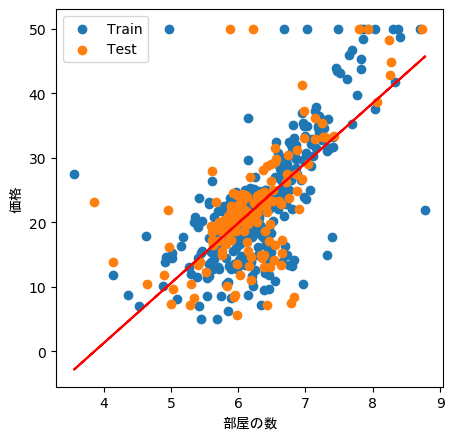

MAE for train data= 4.4296732121040385
MAE for test data= 4.470784290506162
MSE for train data= 42.15765086312224
MSE for test data= 47.03304747975518
R for train data= 0.5026497630040827
R for test data= 0.43514364832115193


In [16]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数を「RM:部屋の数」, 目的変数を「MEDV:価格」としてデータを取り出す
# 説明変数（Numpyの配列）
x = boston_df[['RM']].values
# 目的変数（Numpyの配列）
y = boston_df['MEDV'].values   

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#線形回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train, y_train)
# 説明変数の係数を出力
print('coefficient', model.coef_[0]) 
# 切片を出力
print('intercept', model.intercept_) 

#データの上に、求まった単回帰モデルの直線を描画
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('部屋の数', fontname="MS Gothic")
plt.ylabel('価格', fontname="MS Gothic")
plt.scatter(x_train,y_train,label = "Train")
plt.scatter(x_test,y_test,label   = "Test")
plt.plot(x,model.predict(x),color = "red")
plt.legend()
plt.show()

#学習データに対するMAE
y_pred = model.predict(x_train)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
y_pred = model.predict(x_test)
mae    = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
y_pred     = model.predict(x_test)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
y_pred     = model.predict(x_test)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)                      

coefficient -0.9681407834881232
intercept 34.789780590604124


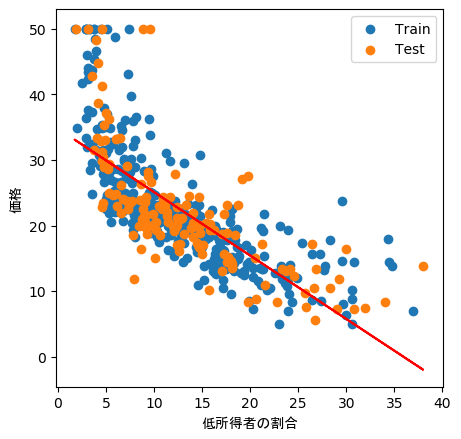

MAE for train data= 4.53102211818924
MAE for test data= 4.4883446998468415
MSE for train data= 37.933978172880295
MSE for test data= 39.81715050474416
R for train data= 0.5524780757890007
R for test data= 0.5218049526125568


In [17]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数を「LSTAT:低所得者の割合」, 目的変数を「MEDV:価格」としてデータを取り出す
# 説明変数（Numpyの配列）
x = boston_df[['LSTAT']].values
# 目的変数（Numpyの配列）
y = boston_df['MEDV'].values 

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#線形回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train, y_train)
# 説明変数の係数を出力
print('coefficient', model.coef_[0]) 
# 切片を出力
print('intercept', model.intercept_) 

#データの上に、求まった単回帰モデルの直線を描画
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('低所得者の割合', fontname="MS Gothic")
plt.ylabel('価格', fontname="MS Gothic")
plt.scatter(x_train,y_train,label = "Train")
plt.scatter(x_test,y_test,label   = "Test")
plt.plot(x,model.predict(x),color = "red")
plt.legend()
plt.show()

#学習データに対するMAE
y_pred = model.predict(x_train)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
y_pred = model.predict(x_test)
mae    = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
y_pred     = model.predict(x_test)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
y_pred     = model.predict(x_test)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)


coefficient 1.0952935267942348
intercept 18.624483504548248


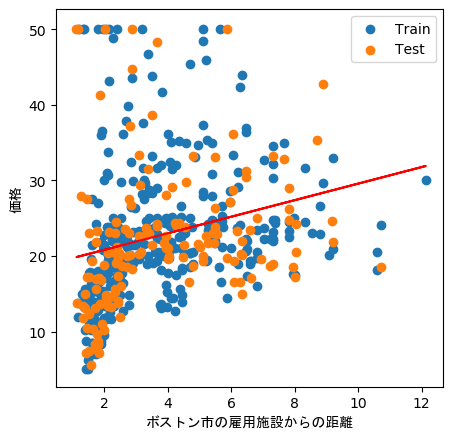

MAE for train data= 6.435713247560876
MAE for test data= 6.413240061021086
MSE for train data= 79.65015335979976
MSE for test data= 78.1785332091509
R for train data= 0.06033609939802731
R for test data= 0.061093350008148195


In [18]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数を「DIS:ボストン市の雇用施設からの距離」, 目的変数を「MEDV:価格」としてデータを取り出す
# 説明変数（Numpyの配列）
x = boston_df[['DIS']].values
# 目的変数（Numpyの配列）
y = boston_df['MEDV'].values   

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#線形回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train, y_train)
# 説明変数の係数を出力
print('coefficient', model.coef_[0]) 
# 切片を出力
print('intercept', model.intercept_) 

#データの上に、求まった単回帰モデルの直線を描画
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('ボストン市の雇用施設からの距離', fontname="MS Gothic")
plt.ylabel('価格', fontname="MS Gothic")
plt.scatter(x_train,y_train,label = "Train")
plt.scatter(x_test,y_test,label   = "Test")
plt.plot(x,model.predict(x),color = "red")
plt.legend()
plt.show()

#学習データに対するMAE
y_pred = model.predict(x_train)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
y_pred = model.predict(x_test)
mae    = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
y_pred     = model.predict(x_test)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
y_pred     = model.predict(x_test)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)                  